In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [56]:
import tensorflow as tf
from tensorflow import keras

In [57]:
mnist = tf.keras.datasets.fashion_mnist

In [58]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

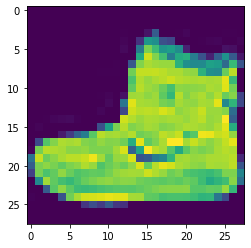

In [59]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0].reshape(28,28));

In [60]:
y_train[0]

9

In [61]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train = x_train/255.0
x_test = x_test/255.0

In [62]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.96):
      print("\nReached 96% accuracy so cancelling training!")
      self.model.stop_training = True

In [66]:
callbacks = myCallback()

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64,(3,3),input_shape = (28,28,1),activation = "relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
                                   tf.keras.layers.MaxPooling2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(128,activation = "relu"),
                                   tf.keras.layers.Dense(64,activation = "relu"),
                                   tf.keras.layers.Dense(10,activation = "softmax")])


model.compile(loss = "sparse_categorical_crossentropy",optimizer = "Adam",metrics = ["accuracy"])

In [ ]:
model.fit(x_train,y_train,epochs = 10,callbacks = [callbacks])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 63s 1ms/sample - loss: 0.4922 - accuracy: 0.8220
Epoch 2/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.3131 - accuracy: 0.8858
Epoch 3/10
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.2707 - accuracy: 0.9010
Epoch 4/10
60000/60000 [==============================] - 62s 1ms/sample - loss: 0.2387 - accuracy: 0.9111
Epoch 5/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.2178 - accuracy: 0.9195
Epoch 6/10
60000/60000 [==============================] - 61s 1ms/sample - loss: 0.1987 - accuracy: 0.9265
Epoch 7/10
50880/60000 [========================>.....] - ETA: 9s - loss: 0.1826 - accuracy: 0.9311

In [65]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 2s 213us/sample - loss: 0.2650 - accuracy: 0.9124


[0.265008546602726, 0.9124]